# [CNN] Padding (강재영)

## 1. Padding이란?
### - 이미지나 영상에 필터를 취할 때 출력 크기를 보정하기 위해 입력 데이터의 사방을 특정한 값으로 보충해 채우는 것


## 2. Padding을 사용하는 이유
### - 결과 데이터의 축소를 막기 위해
#### : 입력 데이터가 n × n pixlel image이고, 필터가 f × f 라면 convolution 시
####   (n-f+1) × (n-f+1) pixel image로 축소됨
#### CNN 과정에서 convolution을 여러 번 진행하면 데이터가 너무 작아져 깊게 학습시킬 데이터가 부족해짐
### - Edge pixel 데이터를 충분하게 사용하기 위해
#### : convolution 시 가장자리에 위치한 데이터는 합성곱 과정에 적게 참여하게 됨
#### padding을 취함으로 가장자리의 데이터도 연산에 동일 횟수로 참여할 수 있음

## 2. Padding의 종류
### - Valid Padding
### - Same Padding
### - Full Padding

### 2.1 Valid Padding
#### ㆍPadding 하지 않는 것을 의미
#### ㆍ결과가 입력 데이터 수보다 항상 작음
#### ㆍ입력 데이터의 모든 원소가 convolution에 같은 비율로 사용되지 않음

### 2.2 Same Padding
#### ㆍ결과가 입력 데이터 수와 같음
#### ㆍ입력 데이터의 모든 원소가 convolution에 같은 비율로 사용됨
#### ㆍ패딩 수 p = (f+1) / 2
#### {(n+2p) × (n+2p)} * (f × f) -> n × n

### 2.3 Full Padding
#### ㆍ결과가 입력 데이터 수보다 늘어남
#### ㆍ패딩 수 p = f+1
#### {(n+2p) × (n+2p)} * (f × f) -> (n+f+1) × (n+f+1)

### 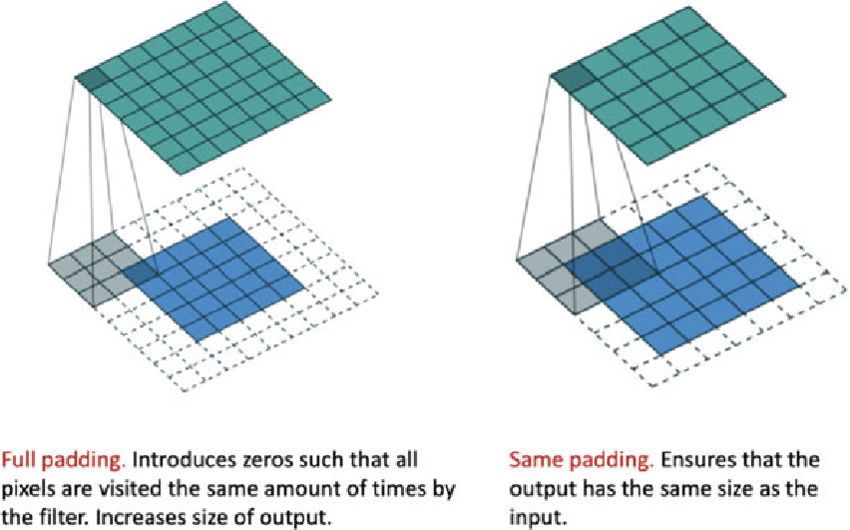

#### - 간단한 행렬로 각종 padding 표시

In [1]:
import numpy as np

In [2]:
image = [[1,2,3],
        [4,5,6]]

In [4]:
# 원본 이미지의 상하좌우에 2개씩 zero-padding
np.pad(image, ((2,2),(2,2)), 'constant', constant_values=0)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [7]:
# 원본 이미지의 상하좌우에 2개씩 reflect-padding
np.pad(image, ((2,2),(2,2)), 'reflect')

array([[3, 2, 1, 2, 3, 2, 1],
       [6, 5, 4, 5, 6, 5, 4],
       [3, 2, 1, 2, 3, 2, 1],
       [6, 5, 4, 5, 6, 5, 4],
       [3, 2, 1, 2, 3, 2, 1],
       [6, 5, 4, 5, 6, 5, 4]])

In [8]:
# 원본 이미지의 상하좌우에 2개씩 symmetric-padding
np.pad(image, ((2,2),(2,2)), 'symmetric')

array([[5, 4, 4, 5, 6, 6, 5],
       [2, 1, 1, 2, 3, 3, 2],
       [2, 1, 1, 2, 3, 3, 2],
       [5, 4, 4, 5, 6, 6, 5],
       [5, 4, 4, 5, 6, 6, 5],
       [2, 1, 1, 2, 3, 3, 2]])

#### - 간단한 행렬로 padding 방법을 달리하여 출력 표시

### 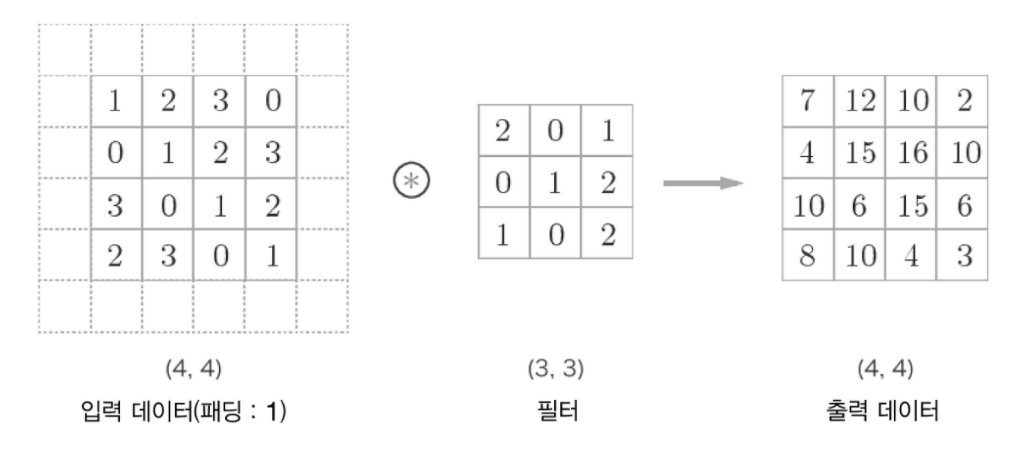

In [20]:
input = np.array([[1,2,3,0],
                  [0,1,2,3],
                  [3,0,1,2],
                  [2,3,0,1]])
input

array([[1, 2, 3, 0],
       [0, 1, 2, 3],
       [3, 0, 1, 2],
       [2, 3, 0, 1]])

In [21]:
input_zero = np.pad(input, pad_width=1, mode='constant', constant_values=0)
input_zero

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0, 0],
       [0, 0, 1, 2, 3, 0],
       [0, 3, 0, 1, 2, 0],
       [0, 2, 3, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [22]:
input_refl = np.pad(input, pad_width=1, mode='reflect')
input_refl

array([[1, 0, 1, 2, 3, 2],
       [2, 1, 2, 3, 0, 3],
       [1, 0, 1, 2, 3, 2],
       [0, 3, 0, 1, 2, 1],
       [3, 2, 3, 0, 1, 0],
       [0, 3, 0, 1, 2, 1]])

In [23]:
input_symm = np.pad(input, pad_width=1, mode='symmetric')
input_symm

array([[1, 1, 2, 3, 0, 0],
       [1, 1, 2, 3, 0, 0],
       [0, 0, 1, 2, 3, 3],
       [3, 3, 0, 1, 2, 2],
       [2, 2, 3, 0, 1, 1],
       [2, 2, 3, 0, 1, 1]])

In [24]:
filter = np.array([[2,0,1],
                   [0,1,2],
                   [1,0,2]])
filter

array([[2, 0, 1],
       [0, 1, 2],
       [1, 0, 2]])

In [25]:
a = input_zero.shape[0]-filter.shape[0] + 1
b = input_zero.shape[1]-filter.shape[1] + 1
zero_result2 = []
for rn in range(a):
    for cn in range(b):
        zero_result1 = input_zero[rn:rn+filter.shape[0],
                                 cn:cn+filter.shape[1]] * filter
        zero_result2.append(np.sum(zero_result1))
        
zero_result = np.array(zero_result2).reshape(a,b)
zero_result

array([[ 7, 12, 10,  2],
       [ 4, 15, 16, 10],
       [10,  6, 15,  6],
       [ 8, 10,  4,  3]])

In [27]:
c = input_refl.shape[0]-filter.shape[0] + 1
d = input_refl.shape[1]-filter.shape[1] + 1
refl_result2 = []
for rn in range(c):
    for cn in range(d):
        refl_result1 = input_refl[rn:rn+filter.shape[0],
                                 cn:cn+filter.shape[1]] * filter
        refl_result2.append(np.sum(refl_result1))
        
refl_result = np.array(refl_result2).reshape(c,d)
refl_result

array([[11, 14, 15, 18],
       [ 8, 15, 16, 19],
       [15,  6, 15, 10],
       [ 8, 15,  8,  7]])

In [29]:
e = input_symm.shape[0]-filter.shape[0] + 1
f = input_symm.shape[1]-filter.shape[1] + 1
symm_result2 = []
for rn in range(e):
    for cn in range(f):
        symm_result1 = input_symm[rn:rn+filter.shape[0],
                                 cn:cn+filter.shape[1]] * filter
        symm_result2.append(np.sum(symm_result1))
        
symm_result = np.array(symm_result2).reshape(e,f)
symm_result

array([[11, 17, 14, 14],
       [ 9, 15, 16, 20],
       [12,  6, 15, 15],
       [22, 12,  9,  9]])

## 3. Stride
### - 합성곱 신경망의 기본구성요소(building block)
### - 필터적용시 이동 간격을 의미
### - 일반적으로 필터(커널)가 입력 데이터에서 1pixel씩 이동하면서 연산하는데,
### stride를 주면 필터 이동시 해당 pixel 만큼 이동하면서 연산하게 됨
### - stride 시 결과 데이터 수
### 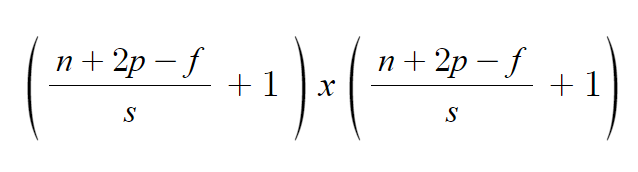
#### * 결과 데이터 수가 정수의 곱 행렬로 나오도록 p(패딩 값), f(필터 크기)을 조정하는게 일반적
#### * s: stride 수